## Support Vector Machine

## Salary Data
### Prepare a Classification model using SVM for Salary Data 

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Import Data

In [2]:
salary_data=pd.read_csv('SalaryData_Train(1).csv')
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 3. Data Understanding

**Data Description:**

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	relationship of individual
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

### 3.1 Initial Analysis

In [3]:
salary_data.shape

(30161, 14)

In [4]:
salary_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
salary_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
salary_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 3.2 Data Visualization

#### Checking Outliers

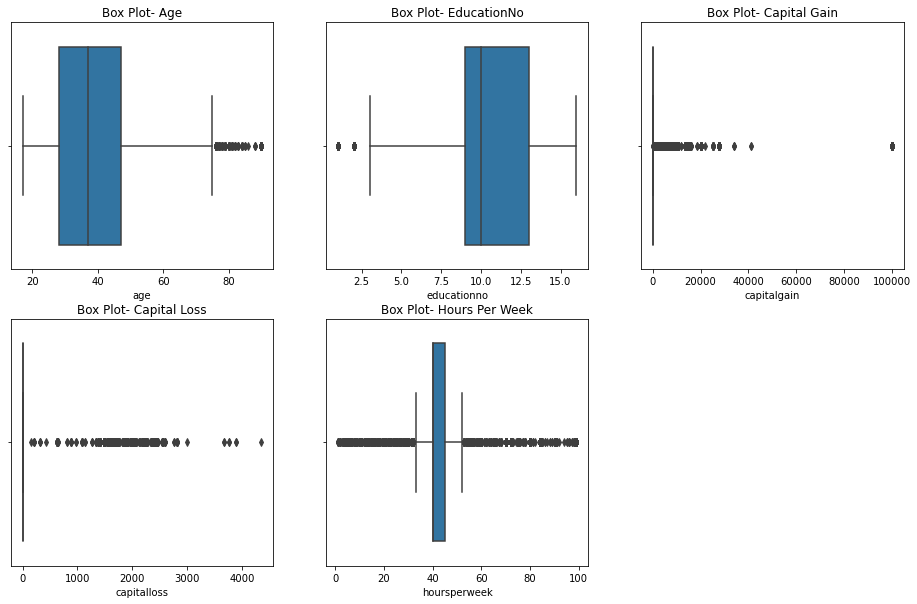

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.boxplot(x='age', data=salary_data)
plt.title('Box Plot- Age')
plt.subplot(2,3,2)
sns.boxplot(x='educationno', data=salary_data)
plt.title('Box Plot- EducationNo')
plt.subplot(2,3,3)
sns.boxplot(x='capitalgain', data=salary_data)
plt.title('Box Plot- Capital Gain')
plt.subplot(2,3,4)
sns.boxplot(x='capitalloss', data=salary_data)
plt.title('Box Plot- Capital Loss')
plt.subplot(2,3,5)
sns.boxplot(x='hoursperweek', data=salary_data)
plt.title('Box Plot- Hours Per Week')
plt.show()

#### Visualization for Categorical Data

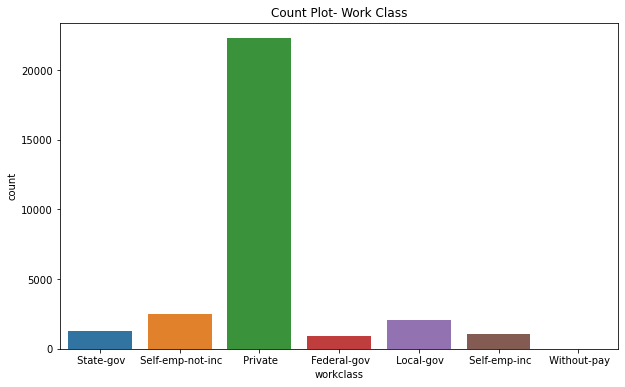

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='workclass', data=salary_data)
plt.title('Count Plot- Work Class')
plt.show()

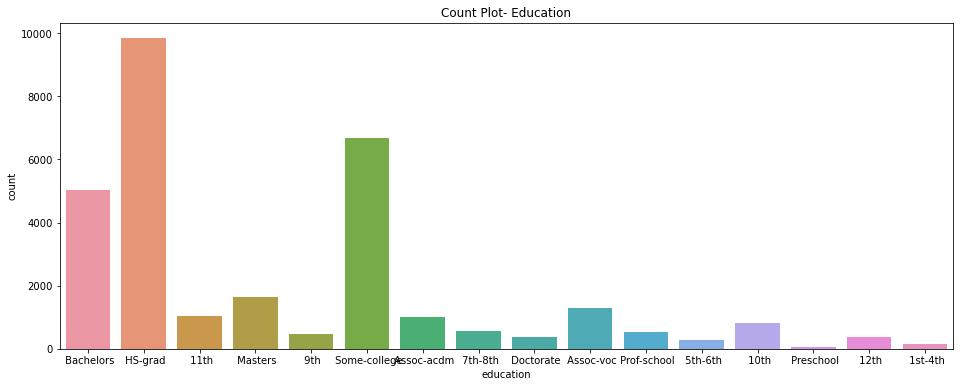

In [9]:
plt.figure(figsize=(16,6))
sns.countplot(x='education', data=salary_data)
plt.title('Count Plot- Education')
plt.show()

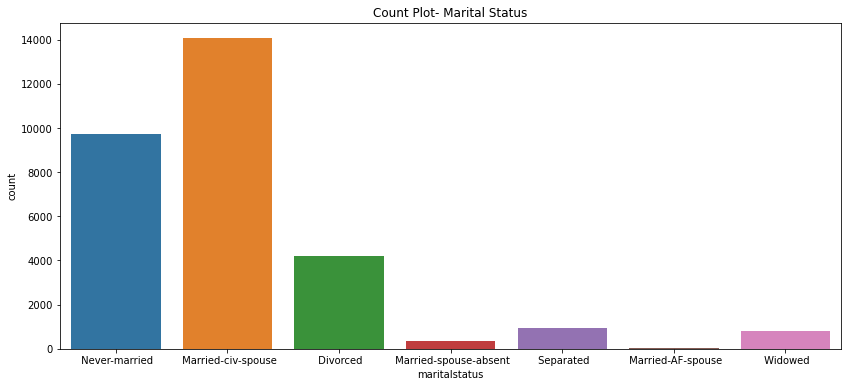

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(x='maritalstatus', data=salary_data)
plt.title('Count Plot- Marital Status')
plt.show()

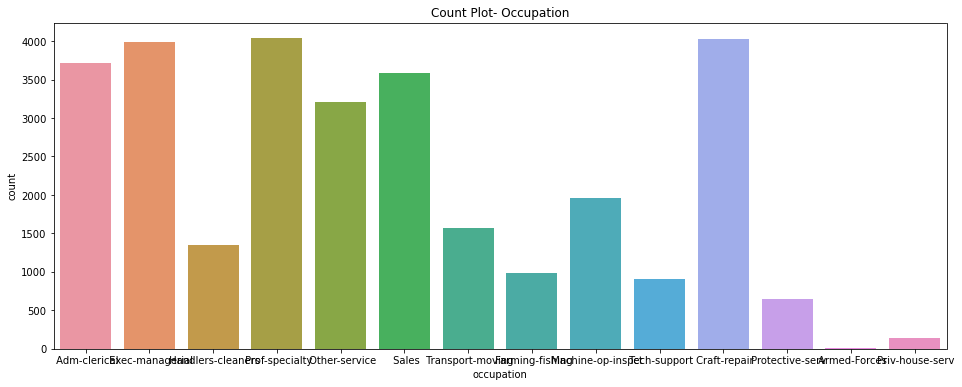

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(x='occupation', data=salary_data)
plt.title('Count Plot- Occupation')
plt.show()

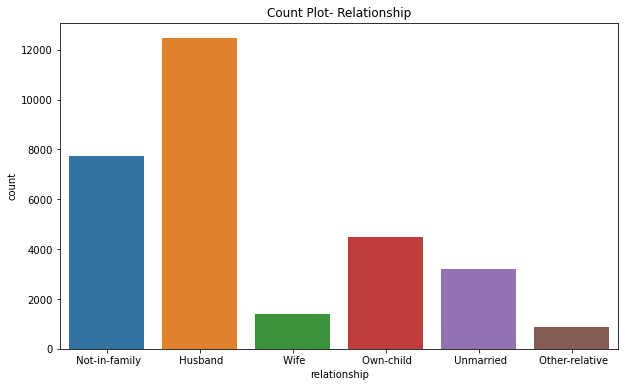

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='relationship', data=salary_data)
plt.title('Count Plot- Relationship')
plt.show()

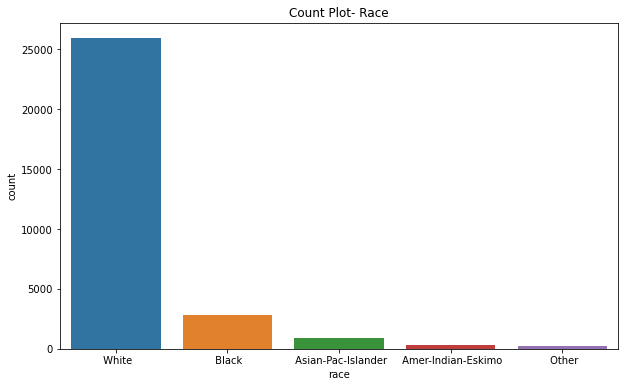

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='race', data=salary_data)
plt.title('Count Plot- Race')
plt.show()

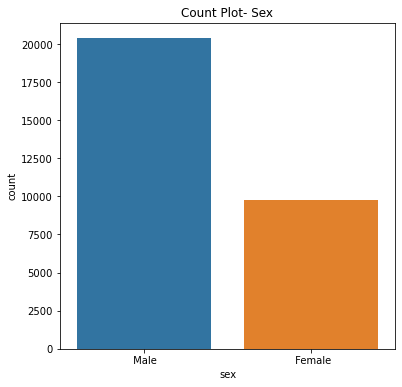

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=salary_data)
plt.title('Count Plot- Sex')
plt.show()

#### Output feature Distribution

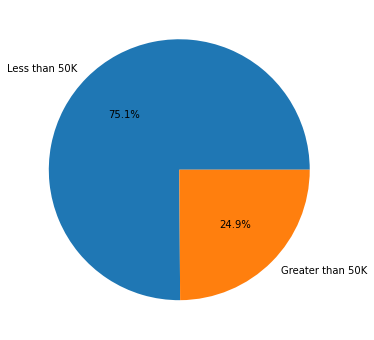

In [15]:
plt.figure(figsize=(8,6))
plt.pie(salary_data['Salary'].value_counts(), labels=['Less than 50K','Greater than 50K'], autopct='%2.1f%%')
plt.show()

## 4. Data Pre-processing

In [16]:
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
# Converting Categorical variables into integers
le=LabelEncoder()
categorical_features=salary_data.select_dtypes(include='object')
salary_data[categorical_features.columns]=salary_data[categorical_features.columns].apply(le.fit_transform)
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [18]:
# Standarizing using Standard Scalar
std_scalar=StandardScaler()
salary_data.iloc[:,[0,3,9,10,11]]=std_scalar.fit_transform(salary_data.iloc[:,[0,3,9,10,11]])
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.042779,5,9,1.128898,4,0,1,4,1,0.146085,-0.218508,-0.077735,37,0
1,0.880261,4,9,1.128898,2,3,0,4,1,-0.147447,-0.218508,-2.331495,37,0
2,-0.033356,2,11,-0.439733,0,5,1,4,1,-0.147447,-0.218508,-0.077735,37,0
3,1.108665,2,1,-1.224048,2,5,0,2,1,-0.147447,-0.218508,-0.077735,37,0
4,-0.794703,2,9,1.128898,2,9,5,2,0,-0.147447,-0.218508,-0.077735,4,0


## 5. Model Building

In [19]:
X=salary_data.drop('Salary', axis=1)
y=salary_data[['Salary']]

In [20]:
X.shape, y.shape

((30161, 13), (30161, 1))

## 6. Model Training || 7. Model Evaluation

### Let us Train our Model by Performing K-fold CV with Different Kernels

#### 1. Linear Kernel

In [21]:
svm_classifier=SVC(kernel='linear')

In [22]:
n_fold=KFold(n_splits=5, shuffle=True, random_state=12)

cv_scores=cross_val_score(estimator=svm_classifier, X=X, y=y, cv=n_fold)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [0.81021051 0.81266578 0.808687   0.80802387 0.81548408]
Mean Accuracy: 0.8110142503146927
Std Deviation: 0.0027463219032838417


#### 2. RBF Kernel

In [23]:
svm_classifier=SVC(kernel='rbf')

In [24]:
n_fold=KFold(n_splits=5, shuffle=True, random_state=12)

cv_scores=cross_val_score(estimator=svm_classifier, X=X, y=y, cv=n_fold)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [0.80822145 0.80603448 0.80537135 0.80139257 0.81001326]
Mean Accuracy: 0.8062066239572714
Std Deviation: 0.0029138433097962014


#### 3. Sigmoid Kernel

In [25]:
svm_classifier=SVC(kernel='sigmoid')

In [26]:
n_fold=KFold(n_splits=5, shuffle=True, random_state=12)

cv_scores=cross_val_score(estimator=svm_classifier, X=X, y=y, cv=n_fold)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [0.76429637 0.75298408 0.75928382 0.74883952 0.75978117]
Mean Accuracy: 0.7570369928259295
Std Deviation: 0.0054571395698192774


#### 4. Polynomial Kernel

In [27]:
svm_classifier=SVC(kernel='poly')

In [28]:
n_fold=KFold(n_splits=5, shuffle=True, random_state=12)

cv_scores=cross_val_score(estimator=svm_classifier, X=X, y=y, cv=n_fold)
print('CV Score:',cv_scores)
print('Mean Accuracy:', cv_scores.mean())
print('Std Deviation:', cv_scores.std())

CV Score: [0.81435438 0.81432361 0.81448939 0.80935013 0.81962865]
Mean Accuracy: 0.8144292322816902
Std Deviation: 0.0032512012162715857


##### From the above results we can say that Linear and Polynomial kernals have better accuracy.
##### We will go with polynomial as its processing time is more faster

In [29]:
svm_classifier=SVC(kernel='poly')
svm_classifier.fit(X,y)

SVC(kernel='poly')

In [30]:
y_pred=svm_classifier.predict(X)

In [31]:
print('Accuracy Score:', round(accuracy_score(y,y_pred),4))

Accuracy Score: 0.8161


In [32]:
print('Confusion Matrix:\n', confusion_matrix(y,y_pred))

Confusion Matrix:
 [[22099   554]
 [ 4992  2516]]


In [33]:
print('Classification Report:\n', classification_report(y,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     22653
           1       0.82      0.34      0.48      7508

    accuracy                           0.82     30161
   macro avg       0.82      0.66      0.68     30161
weighted avg       0.82      0.82      0.79     30161



#### Now let us test the data by giving the above intelligence 

In [34]:
salary_data_test=pd.read_csv('SalaryData_Test(1).csv')
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### Now let us Analyse and Pre-process the test data

In [35]:
salary_data_test.shape

(15060, 14)

In [37]:
salary_data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [38]:
salary_data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [39]:
# Converting Categorical variables into integers
categorical_features_test=salary_data_test.select_dtypes(include='object')
salary_data_test[categorical_features_test.columns]=salary_data_test[categorical_features_test.columns].apply(le.fit_transform)
salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [40]:
# Standarizing using Standard Scalar
salary_data_test.iloc[:,[0,3,9,10,11]]=std_scalar.fit_transform(salary_data_test.iloc[:,[0,3,9,10,11]])
salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,-1.029005,2,1,-1.216563,4,6,3,2,1,-0.145438,-0.219169,-0.078889,37,0
1,-0.057423,2,11,-0.434898,2,4,0,4,1,-0.145438,-0.219169,0.750131,37,0
2,-0.804794,1,7,0.737599,2,10,0,4,1,-0.145438,-0.219169,-0.078889,37,1
3,0.391000,2,15,-0.044066,2,6,0,2,1,0.852624,-0.219169,-0.078889,37,1
4,-0.356371,2,0,-1.607395,4,7,1,4,1,-0.145438,-0.219169,-0.907909,37,0


In [41]:
X_test=salary_data_test.drop('Salary', axis=1)
y_test=salary_data_test[['Salary']]

In [42]:
X_test.shape, y_test.shape

((15060, 13), (15060, 1))

## 9. Model Testing & Model Evaluation

In [43]:
y_pred_test=svm_classifier.predict(X_test)

In [44]:
print('Accuracy Score:', round(accuracy_score(y_test,y_pred_test),4))

Accuracy Score: 0.8141


In [45]:
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred_test))

Confusion Matrix:
 [[11068   292]
 [ 2507  1193]]


In [46]:
print('Classification Report:\n', classification_report(y_test,y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     11360
           1       0.80      0.32      0.46      3700

    accuracy                           0.81     15060
   macro avg       0.81      0.65      0.67     15060
weighted avg       0.81      0.81      0.78     15060



## ==========================================================================